In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('data/master.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
#dropping country-year and HDI for year
data.drop(['country-year','HDI for year'],axis=1,inplace=True)

In [6]:
data.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,"63,067,077,179",2309,Boomers


In [11]:
year_group = data.groupby('year')

In [12]:
years = data.year.unique()
years.sort()

In [16]:
world_suicides_per_100kpop = ((year_group.suicides_no.sum())/(year_group.population.sum()))*100000
world_suicides_per_100kpop

year
1985    11.507336
1986    11.716562
1987    11.583430
1988    11.481514
1989    13.075653
1990    13.184123
1991    13.290036
1992    13.473570
1993    14.477430
1994    14.983896
1995    15.302228
1996    14.842676
1997    14.136594
1998    14.467522
1999    14.418167
2000    14.218988
2001    14.277565
2002    14.054529
2003    13.929010
2004    13.800972
2005    13.509349
2006    12.676402
2007    12.551757
2008    12.654217
2009    12.320793
2010    11.951250
2011    11.863573
2012    12.032546
2013    11.808461
2014    11.661994
2015    11.474887
2016    11.811337
dtype: float64

In [17]:
worldwide_total_suicide_by_year = year_group['suicides_no'].agg('sum')
worldwide_total_suicide_by_year

year
1985    116063
1986    120670
1987    126842
1988    121026
1989    160244
1990    193361
1991    198020
1992    211473
1993    221565
1994    232063
1995    243544
1996    246725
1997    240745
1998    249591
1999    256119
2000    255832
2001    250652
2002    256095
2003    256079
2004    240861
2005    234375
2006    233361
2007    233408
2008    235447
2009    243487
2010    238702
2011    236484
2012    230160
2013    223199
2014    222984
2015    203640
2016     15603
Name: suicides_no, dtype: int64

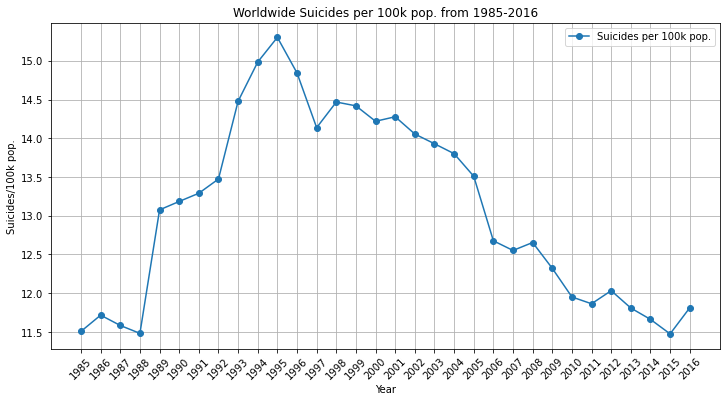

In [19]:
fig = plt.figure(figsize=(12,6))
plt.plot(years,world_suicides_per_100kpop, marker='o',label='Suicides per 100k pop.')
plt.xticks(years,rotation=45)
plt.xlabel('Year')
plt.ylabel('Suicides/100k pop.')
plt.title('Worldwide Suicides per 100k pop. from 1985-2016')
plt.legend()
plt.grid()
plt.show()
fig.savefig('Worldwise Suicides per 100k pop from 1985-2016')

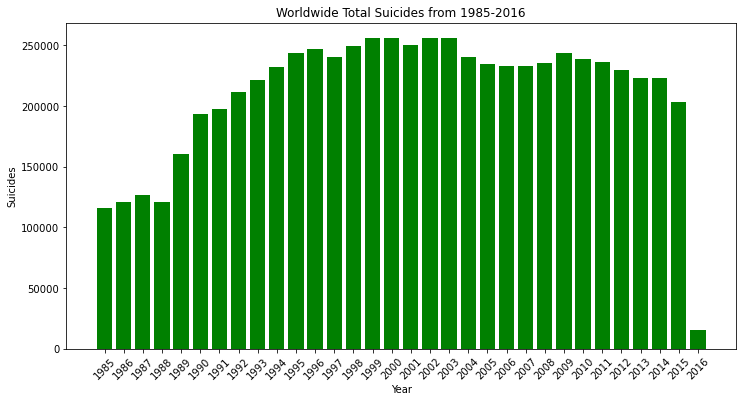

In [25]:
fig = plt.figure(figsize=(12,6))
plt.bar(years,worldwide_total_suicide_by_year,color='g')
plt.xticks(years,rotation=45)
plt.xlabel('Year')
plt.ylabel('Suicides')
plt.title('Worldwide Total Suicides from 1985-2016')
plt.show()
fig.savefig('Worldwide Total Suicides from 1985-2016')

In [26]:
male_group = data[data['sex']=='male'].groupby('year')
female_group = data[data['sex']=='female'].groupby('year')

In [27]:
world_male_suicides_per_100kpop = (male_group['suicides_no'].sum())/(male_group['population'].sum())*100000
world_female_suicides_per_100kpop = (female_group['suicides_no'].sum())/(female_group['population'].sum())*100000

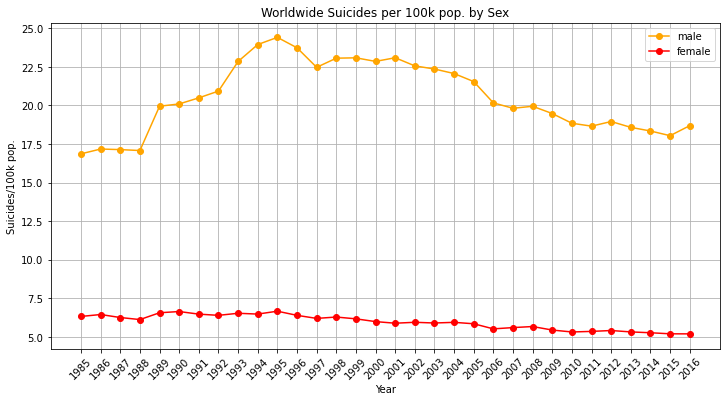

In [29]:
fig = plt.figure(figsize=(12,6))
plt.plot(years,world_male_suicides_per_100kpop,marker='o',label='male',color='orange')
plt.plot(years,world_female_suicides_per_100kpop,marker='o',label='female',color='red')
plt.xticks(years,rotation=45)
plt.xlabel('Year')
plt.ylabel('Suicides/100k pop.')
plt.title('Worldwide Suicides per 100k pop. by Sex')
plt.legend()
plt.grid()
plt.show()
fig.savefig('Wordwide Suicides per 100k pop by Sex')

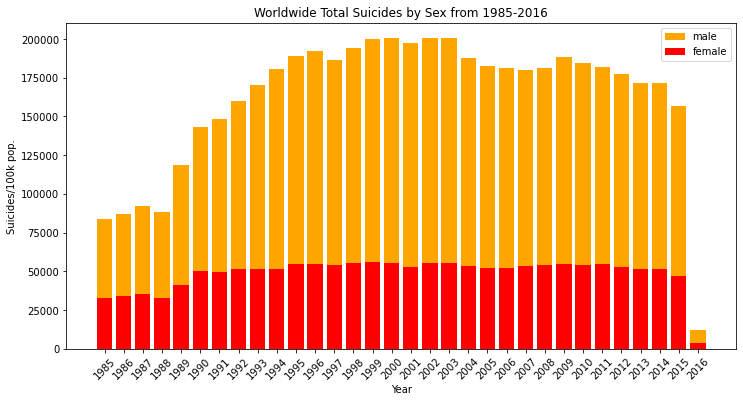

In [30]:
fig = plt.figure(figsize=(12,6))
plt.bar(years,male_group['suicides_no'].sum(),label='male',color='orange')
plt.bar(years,female_group['suicides_no'].sum(),label='female',color='red')
plt.xticks(years,rotation=45)
plt.xlabel('Year')
plt.ylabel('Suicides/100k pop.')
plt.title('Worldwide Total Suicides by Sex from 1985-2016')
plt.legend()
plt.show()
fig.savefig('Worldwide Total Suicides by Sex from 1985-2016')

In [31]:
male_perc_by_year = (male_group['suicides_no'].sum()/year_group.suicides_no.sum())*100
female_perc_by_year = (female_group['suicides_no'].sum()/year_group.suicides_no.sum())*100

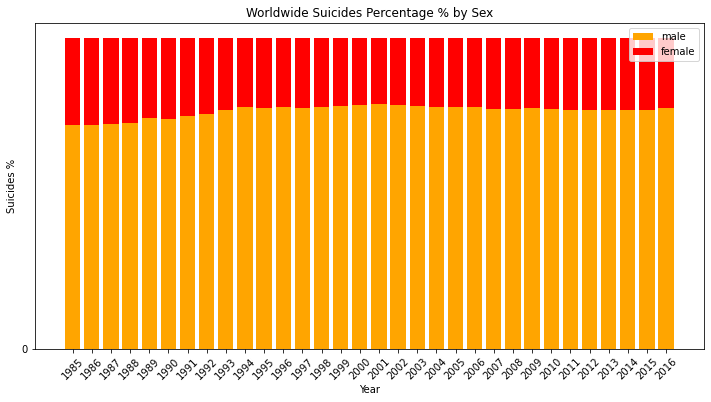

In [35]:
fig = plt.figure(figsize=(12,6))
plt.bar(years,male_perc_by_year,label='male',color='orange')
plt.bar(years,female_perc_by_year,label='female',color='red',bottom=np.array(male_perc_by_year))
plt.xticks(years,rotation=45)
plt.yticks(np.arange(0,110,110))
plt.xlabel('Year')
plt.ylabel('Suicides %')
plt.title('Worldwide Suicides Percentage % by Sex')
plt.legend()
plt.show()
fig.savefig('Worldwide Suicides Percentage % by Sex')

In [36]:
data.age.value_counts()

55-74 years    4642
35-54 years    4642
25-34 years    4642
15-24 years    4642
75+ years      4642
5-14 years     4610
Name: age, dtype: int64

In [39]:
world_5_14_age_group = data[data['age']=='5-14 years'].groupby('year')
world_15_24_age_group = data[data['age']=='15-24 years'].groupby('year')
world_25_34_age_group = data[data['age']=='25-34 years'].groupby('year')
world_35_54_age_group = data[data['age']=='35-54 years'].groupby('year')
world_55_74_age_group = data[data['age']=='55-74 years'].groupby('year')
world_75_above_age_group = data[data['age']=='75+ years'].groupby('year')

In [40]:
a = ((world_5_14_age_group.suicides_no.sum()) / (world_5_14_age_group.population.sum()))*100000
b = (world_15_24_age_group.suicides_no.sum() / (world_15_24_age_group.population.sum()))*100000
c = (world_25_34_age_group.suicides_no.sum() / (world_25_34_age_group.population.sum()))*100000
d = (world_35_54_age_group.suicides_no.sum() / (world_35_54_age_group.population.sum()))*100000
e = (world_55_74_age_group.suicides_no.sum() / (world_55_74_age_group.population.sum()))*100000
f = (world_75_above_age_group.suicides_no.sum() / (world_75_above_age_group.population.sum()))*100000

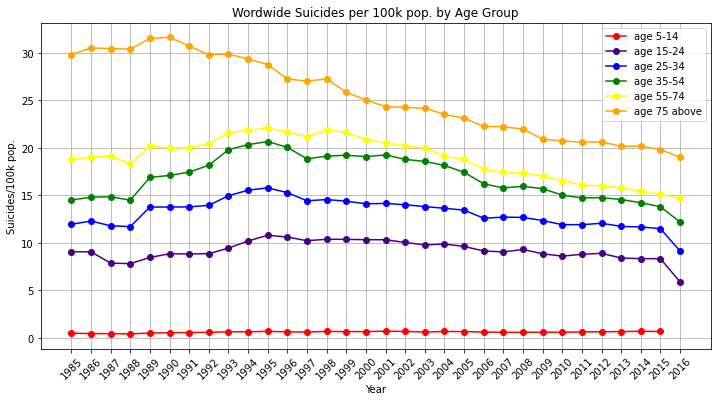

In [42]:
fig = plt.figure(figsize=(12,6))
plt.plot(a,label='age 5-14',color='red',marker='o')
plt.plot(b,label='age 15-24',color='indigo',marker='o')
plt.plot(c, label = 'age 25-34', color = 'blue', marker = 'o')
plt.plot(d, label = 'age 35-54', color = 'green', marker = 'o')
plt.plot(e, label = 'age 55-74', color = 'yellow', marker = 'o')
plt.plot(f, label = 'age 75 above', color = 'orange', marker = 'o')
plt.xticks(years, rotation = 45)
plt.xlabel('Year')
plt.ylabel('Suicides/100k pop.')
plt.title('Wordwide Suicides per 100k pop. by Age Group')
plt.legend()
plt.grid()
plt.show()
fig.savefig('Wordwide Suicides per 100k pop by Age Group')

In [43]:
data.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [44]:
world_x_gen_group = data[data['generation']=='Generation X'].groupby('year')
world_silent_gen_group = data[data['generation']=='Silent'].groupby('year')
world_millenials_gen_group = data[data['generation']=='Millenials'].groupby('year')
world_boomers_gen_group = data[data['generation']=='Boomers'].groupby('year')
world_gi_gen_group = data[data['generation']=='G.I. Generation'].groupby('year')
world_z_gen_group = data[data['generation']=='Generation Z'].groupby('year')

In [45]:
g = (world_x_gen_group.suicides_no.sum() / world_x_gen_group.population.sum())*100000
h = (world_silent_gen_group.suicides_no.sum() / world_silent_gen_group.population.sum())*100000
i = (world_millenials_gen_group.suicides_no.sum() / world_millenials_gen_group.population.sum())*100000
j = (world_boomers_gen_group.suicides_no.sum() / world_boomers_gen_group.population.sum())*100000
k = (world_gi_gen_group.suicides_no.sum() / world_gi_gen_group.population.sum())*100000
l = (world_z_gen_group.suicides_no.sum() / world_z_gen_group.population.sum())*100000

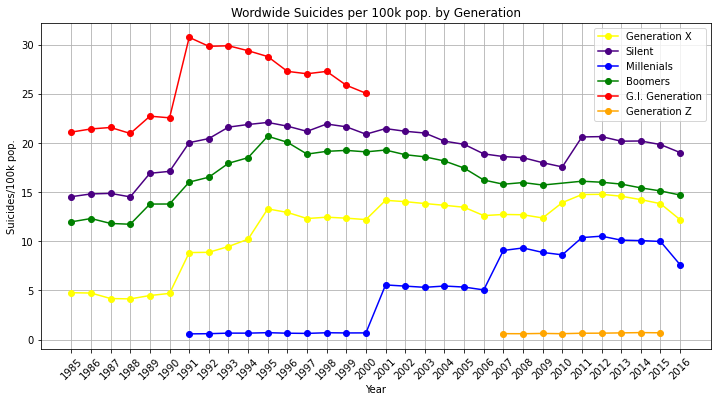

In [46]:
fig = plt.figure(figsize = (12,6))
plt.plot(g, label = 'Generation X', color = 'yellow', marker = 'o')
plt.plot(h, label = 'Silent', color = 'indigo', marker = 'o')
plt.plot(i, label = 'Millenials', color = 'blue', marker = 'o')
plt.plot(j, label = 'Boomers', color = 'green', marker = 'o')
plt.plot(k, label = 'G.I. Generation', color = 'red', marker = 'o')
plt.plot(l, label = 'Generation Z', color = 'orange', marker = 'o')
plt.xticks(years, rotation = 45)
plt.xlabel('Year')
plt.ylabel('Suicides/100k pop.')
plt.title('Wordwide Suicides per 100k pop. by Generation')
plt.legend()
plt.grid()
plt.show()
fig.savefig('Wordwide Suicides per 100k pop by Generation')

# Countrywise Analysis

In [48]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [49]:
country_group = data.groupby('country')

In [50]:
country_suicides_per_100k_pop = (country_group['suicides_no'].sum() / country_group['population'].sum())*100000
country_suicides_per_100k_pop.sort_values(  inplace = True)

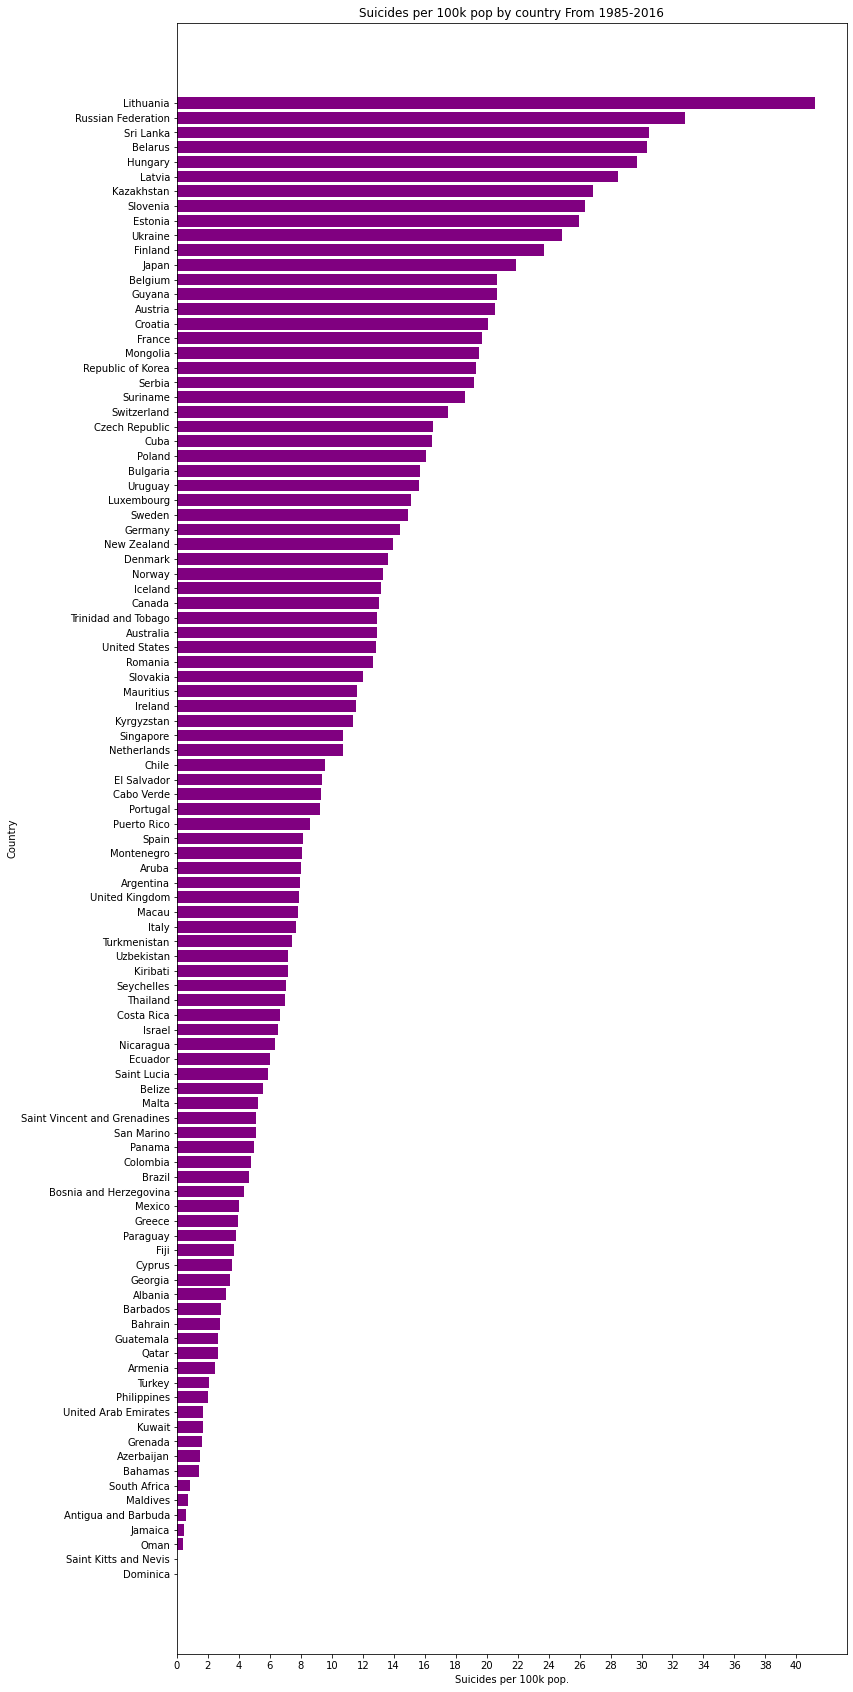

In [51]:
fig = plt.figure(figsize = (12,30))
plt.barh(country_suicides_per_100k_pop.index, country_suicides_per_100k_pop, color = 'purple')
plt.xlabel('Suicides per 100k pop.')
plt.xticks(range(0,42,2))
plt.ylabel('Country')
plt.title('Suicides per 100k pop by country From 1985-2016' )
plt.show()
fig.savefig('Suicides per 100k pop by country From 1985-2016')

In [53]:
male_group_country = data[data['sex'] == 'male'].groupby('country')
female_group_country = data[data['sex'] == 'female'].groupby('country')

In [54]:
male_perc_suicides_by_country = (male_group_country['suicides_no'].sum() / country_group['suicides_no'].sum())*100
female_perc_suicides_by_country = (female_group_country['suicides_no'].sum() / country_group['suicides_no'].sum())*100

In [55]:
male_perc_suicides_by_country

country
Albania                 64.822335
Antigua and Barbuda     90.909091
Argentina               77.710748
Armenia                 74.015748
Aruba                   83.168317
                          ...    
United Arab Emirates    84.244373
United Kingdom          76.106867
United States           79.323567
Uruguay                 78.535546
Uzbekistan              73.393098
Name: suicides_no, Length: 101, dtype: float64

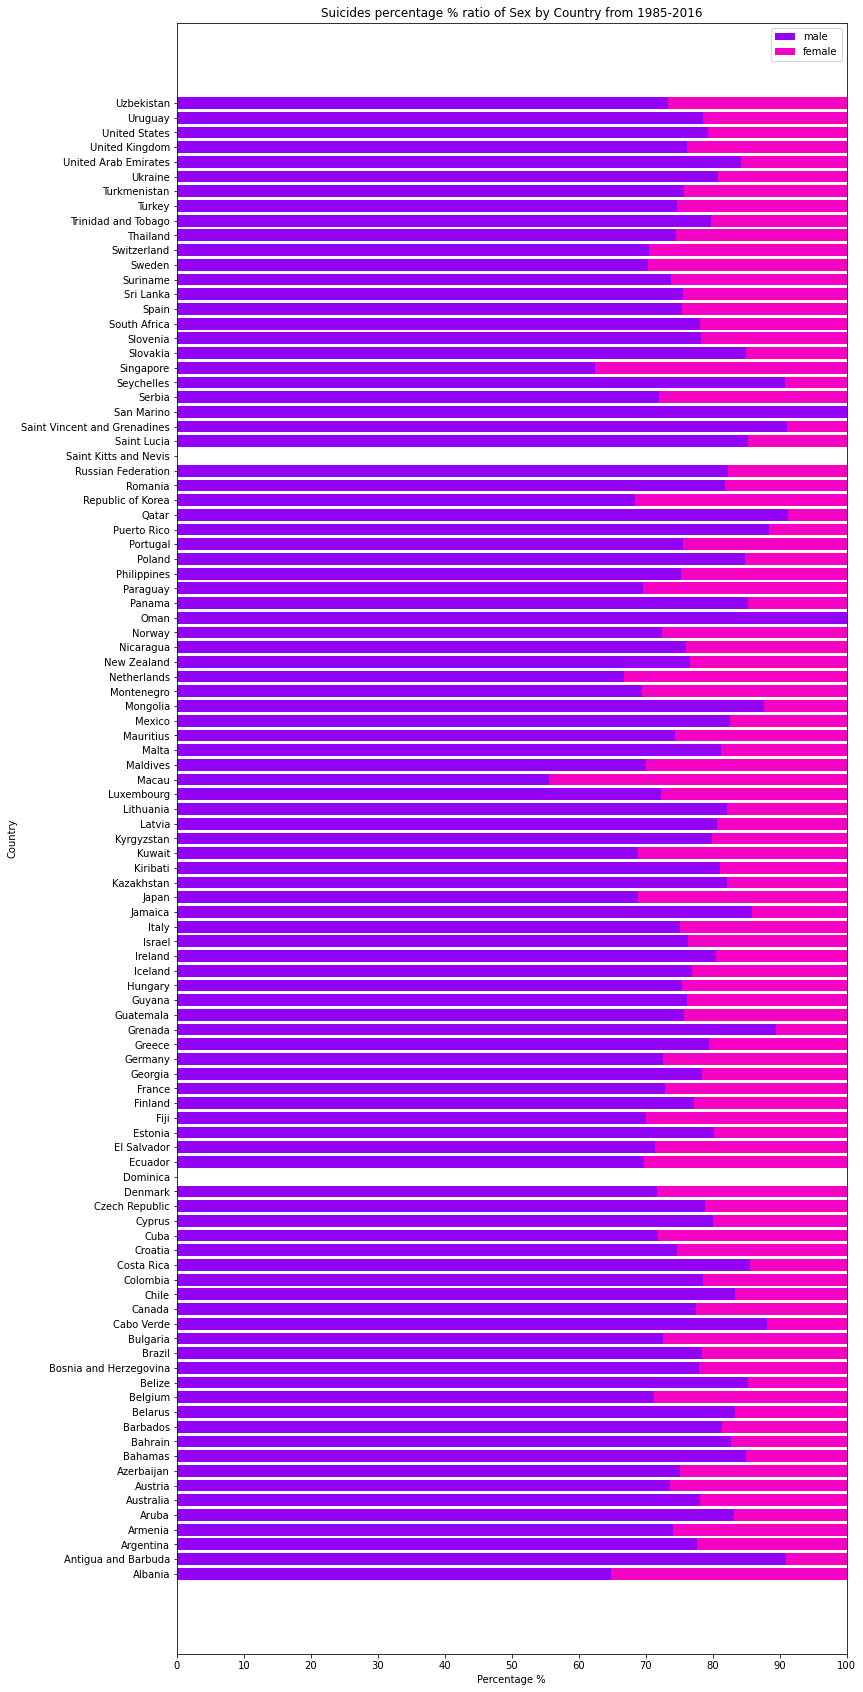

In [56]:
fig = plt.figure(figsize = (12,30))
plt.barh(male_perc_suicides_by_country.index, male_perc_suicides_by_country, color = '#9402f5', label = 'male')
plt.barh(male_perc_suicides_by_country.index, female_perc_suicides_by_country, color = '#f502c4', label = 'female', left = male_perc_suicides_by_country)
plt.xlabel('Percentage %')
plt.xticks(range(0,110,10))
plt.ylabel('Country')
plt.legend()
plt.title('Suicides percentage % ratio of Sex by Country from 1985-2016')
plt.show()
fig.savefig('Suicides percentage % ratio of Sex by Country from 1985-2016')

#  Consideration for gdp_per_capita:
# >25000 as High, 5000 to 25000 as Medium and < 5000 as Low

In [57]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [58]:
data['gdp_per_capita ($)'].describe()

count     27820.000000
mean      16866.464414
std       18887.576472
min         251.000000
25%        3447.000000
50%        9372.000000
75%       24874.000000
max      126352.000000
Name: gdp_per_capita ($), dtype: float64

In [75]:
data.loc[data['gdp_per_capita ($)'] < 5000, 'Income Category'] = 'Low'
data.loc[(data['gdp_per_capita ($)'] > 5000) & (data['gdp_per_capita ($)'] <25000), 'Income Category'] = 'Medium'
data.loc[data['gdp_per_capita ($)'] > 25000, 'Income Category'] = 'High'

In [76]:
data['Income Category'].value_counts()

Medium    11168
Low        9740
High       6912
Name: Income Category, dtype: int64

In [77]:
data.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,Income Cateory,Inocme Category,Income Category
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X,Low,NaN,Low
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent,Low,NaN,Low
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z,Low,NaN,Low
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z,Low,NaN,Low
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,"63,067,077,179",2309,Boomers,Low,NaN,Low


In [78]:
income_group = data.groupby('Income Category')

In [79]:
income_perc_suicides = round((income_group['suicides_no'].sum() / data['suicides_no'].sum())*100,1)

In [80]:
income_perc_suicides

Income Category
High      39.7
Low       29.2
Medium    31.1
Name: suicides_no, dtype: float64

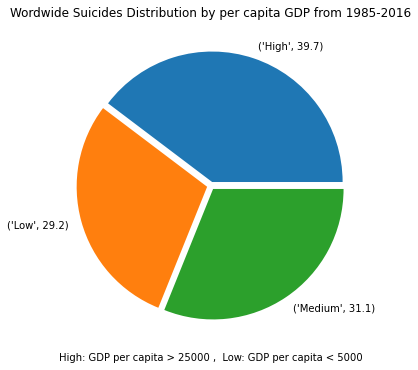

In [81]:
fig = plt.figure(figsize = (12,6))
plt.pie(income_perc_suicides, explode = (.03,.03,.03), labels= list(zip(income_perc_suicides.index,income_perc_suicides)))
plt.title('Wordwide Suicides Distribution by per capita GDP from 1985-2016')
plt.xlabel("High: GDP per capita > 25000 ,  Low: GDP per capita < 5000")
plt.show()
fig.savefig('Wordwide Suicides Distribution by per capita GDP from 1985-2016')